In [3]:
import numpy as np
import pyswarms as ps

c1 = 100
c2 = 100
x1_f = 0.0
x2_f = 0.0
tf = 2.0
N = 50
dt = tf/N

x0 = np.array([1.0, 1.0])

def state_equations(u):
    M, N = u.shape
    X = np.zeros((M, N, 2))
    X[:, 0, :] = x0
    for i in range(1, N):
        X[:, i, 0] = X[:, i-1, 0] + dt * X[:, i-1, 1]
        X[:, i, 1] = X[:, i-1, 1] + dt * u[:, i-1]
    return X

def cost_function(u):
    X = state_equations(u)
    x1_coeff = c1 * (X[:, -1, 0] - x1_f)**2
    x2_coeff = c2 * (X[:, -1, 1] - x2_f)**2
    integral = 0.5 * np.sum(u**2, axis=1) * dt
    return x1_coeff + x2_coeff + integral

# Define bounds for u
bounds = (-4 * np.ones(N), 3 * np.ones(N))

# Initialize the optimizer
options_local = {'c1': 0.5, 'c2': 0.5, 'w': 0.8, 'k': 3, 'p': 1}
options_global = {'c1': 0.5, 'c2': 0.5, 'w': 0.8}
optimizer = ps.single.LocalBestPSO(n_particles=20, dimensions=N, options=options_local, bounds=bounds)

# Perform optimization
best_cost, best_u = optimizer.optimize(cost_function, iters=1000)

# Print the optimal control
print("Optimal control u(t):", best_u)
    

2024-07-13 23:44:20,303 - pyswarms.single.local_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.8, 'k': 3, 'p': 1}
pyswarms.single.local_best: 100%|██████████|1000/1000, best_cost=65.5
2024-07-13 23:44:20,843 - pyswarms.single.local_best - INFO - Optimization finished | best cost: 65.52973701055437, best pos: [-3.97840254 -2.20335796 -3.74717934 -3.37026173  0.9923875  -2.92420917
 -1.57543479 -3.15829906 -0.27462595 -3.48370958 -2.60274496 -3.26446395
 -2.85980198 -1.41619924  0.18109381 -2.30516159 -0.74726809  1.41225576
  1.28642942 -2.90837083 -0.21626003  2.3441741  -2.05630589 -1.22903678
 -1.35277417  2.68642535 -0.71717971 -0.34995947  2.70230113 -0.23841085
  1.64069024 -3.01349257 -1.46126492 -1.10324233  0.29953412 -2.51427358
 -2.72963698 -0.30257708 -0.15891311  0.86574038  0.44223267 -0.10575047
  0.68988968 -1.80312595  0.41566469 -0.19322054  1.6335033   0.05363735
  0.82100358 -0.97741575]


Optimal control u(t): [-3.97840254 -2.20335796 -3.74717934 -3.37026173  0.9923875  -2.92420917
 -1.57543479 -3.15829906 -0.27462595 -3.48370958 -2.60274496 -3.26446395
 -2.85980198 -1.41619924  0.18109381 -2.30516159 -0.74726809  1.41225576
  1.28642942 -2.90837083 -0.21626003  2.3441741  -2.05630589 -1.22903678
 -1.35277417  2.68642535 -0.71717971 -0.34995947  2.70230113 -0.23841085
  1.64069024 -3.01349257 -1.46126492 -1.10324233  0.29953412 -2.51427358
 -2.72963698 -0.30257708 -0.15891311  0.86574038  0.44223267 -0.10575047
  0.68988968 -1.80312595  0.41566469 -0.19322054  1.6335033   0.05363735
  0.82100358 -0.97741575]


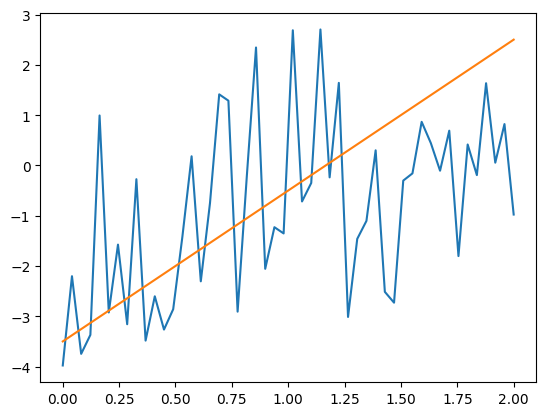

In [4]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0, 2, N), best_u)
plt.plot(np.linspace(0, 2, N), 3 * np.linspace(0, 2, N) - 3.5)

In [5]:
def generate_unique_numbers(n, k, init):
    arr = [init]
    while len(arr) < k + 1:
        num = np.random.randint(0, n)
        if num not in arr:
            arr.append(num)
    return np.array(arr)

In [6]:
ind = generate_unique_numbers(20, 3, 2)
x = np.random.rand(20)

In [7]:
print(x)
print(ind)
print(x[ind])

[0.42671971 0.52946112 0.04962728 0.48183846 0.59069998 0.85957268
 0.08010057 0.68618358 0.88820227 0.14815952 0.62112468 0.71937685
 0.38652742 0.1942549  0.77182981 0.33939392 0.5536065  0.40153569
 0.75457824 0.93631751]
[ 2 19 16 17]
[0.04962728 0.93631751 0.5536065  0.40153569]


In [111]:
def state_equations(u, x0, dt):
    N, = u.shape
    X = np.zeros((N, 2))
    X[0, :] = [1, 1]
    for i in range(1, N):
        X[i, 0] = X[i-1, 0] + dt * X[i-1, 1]
        X[i, 1] = X[i-1, 1] + dt * u[i-1]
    # t = np.linspace(0.0, 2.0, 10000, dtype=np.float64)
    # X[:, 0] = 0.5 * t ** 3 - 1.75 * t ** 2 + t + 1
    # X[:, 1] = 1.5 * t ** 2 - 3.5 * t + 1
    return X

def cost_function(u, x0, dt):
    c1 = 1000000
    c2 = 1000000
    X = state_equations(u, x0, dt)
    x1_coeff = c1 * (X[-1, 0] - 0)**2
    x2_coeff = c2 * (X[-1, 1] - 0)**2
    integral = 0.5 * np.sum(u**2) * dt
    return x1_coeff + x2_coeff + integral
t = np.linspace(0.0, 2.0, 10000, dtype=np.float64)
u = 3 * t - 3.5
print(cost_function(u, [0, 0], t[1] - t[0]))

3.8609671532192795


In [106]:

def LocalBestSwarm(N, n, MINNF, vmax, C1min, C1max, C2min, C2max, C3min, C3max, Wmin, Wmax, Xmin, Xmax, Vmax, T, delta_s_max, cost_function, x0, dt):
    X = np.zeros((N, n))
    P_best = np.zeros((N, n))
    BEST = np.zeros(N)
    fitness = np.zeros(N)
    V = np.zeros((N, n))
    for i in range(N):
        for d in range(n):
            X[i, d] = Xmin + np.random.rand() * (Xmax - Xmin)
            V[i, d] = -Vmax + np.random.rand() * (2 * Vmax)
        P_best[i] = X[i]
        fitness[i] = cost_function(X[i], x0, 2.0/n)
        BEST[i] = fitness[i]
    i_0 = np.argmin(fitness)
    G_best = np.min(fitness)
    P_gbest = X[i_0]
    found = False
    s = 1
    NF = np.zeros(N)
    while (s <= T and not found):

        C_1 = C1min + (C1max - C1min) * s / T
        C_2 = C2min + (C2max - C2min) * s / T
        C_3 = C3min + (C3max - C3min) * s / T
        W = Wmax - (Wmax - Wmin) * s / T
        for i in range(N):

            social_neighbourhood = generate_unique_numbers(N, 3, i)
            P_lbest = P_best[social_neighbourhood[np.argmin(BEST[social_neighbourhood])]]

            for d in range(n):
                R1 = np.random.rand()
                R2 = np.random.rand()
                R3 = np.random.rand()
                V[i, d] = W * V[i, d] + C_1 * R1 * (P_best[i, d] - X[i, d]) + C_2 * R2 * (P_lbest[d] - X[i, d]) + C_3 * R3 * (P_gbest[d] - X[i, d])

                # velocity control
                if V[i, d] > vmax:
                    V[i, d] = vmax
                if V[i, d] < -vmax:
                    V[i, d] = -vmax
                X[i, d] = X[i, d] + V[i, d]

                # position control
                if X[i, d] > Xmax:
                    tau = X[i, d] - Xmax
                    X[i, d] = Xmax - tau
                    V[i, d] = -(V[i, d] - tau)
                if X[i, d] < Xmin:
                    tau = Xmin - X[i, d]
                    X[i, d] = Xmax + tau
                    V[i, d] = -(V[i, d] - tau)
                
            # step control
            for d in range(n - 1):
                delta_gt_mx = X[:, d + 1] - X[:, d] > delta_s_max
                X[delta_gt_mx, d+1] = X[delta_gt_mx, d] + delta_s_max
                delta_lt_mn = X[:, d + 1] - X[:, d] < -delta_s_max
                X[delta_lt_mn, d+1] = X[delta_lt_mn, d] - delta_s_max
            
            fitness[i] = cost_function(X[i], x0, 2.0/n)

            if fitness[i] < BEST[i]:
                P_best[i] = X[i]
                BEST[i] = fitness[i]
            else:
                NF[i] = NF[i] + 1
            
            if fitness[i] < G_best:
                G_best = fitness[i]
                P_gbest = X[i]
            
        if np.all(NF >= MINNF):
            found = True
        
        s = s + 1

    return G_best, P_gbest, BEST

                    
                


In [107]:
best, best_u, best = LocalBestSwarm(N=20, n=20, MINNF=100, vmax=5, C1min=0.5, C1max=2, C2min=1, C2max=1.5, C3min=0.5, C3max=1.5, Wmin=0.2, Wmax=0.5, Xmin=-4, Xmax=3, Vmax=5, T=1000, delta_s_max=3, cost_function=cost_function, x0=x0, dt=dt)

In [108]:
print(best)

[1.06933288e+03 9.00378042e+01 2.47319978e+04 7.00749455e+00
 9.86526146e+04 7.00274184e+00 2.41906311e+04 4.39173897e+04
 1.02322088e+01 1.57327972e+01 9.05066793e+00 8.62031336e+00
 6.52383597e+00 4.39260095e+02 8.43241416e+01 1.46304112e+01
 1.45254294e+01 7.01157114e+00 5.13446185e+04 2.94863974e+02]


In [109]:
print(best_u)

[-2.70189977 -3.39803284 -2.58412888  0.41587112 -2.03969965 -2.83527757
  0.10060004 -2.86565915 -1.7959406  -1.23503107 -0.313128    0.15417029
  2.98834924  2.97081588  0.00914603  0.36247017  2.21440866  1.89883304
  2.80906037  0.16146195]


[[ 1.          1.        ]
 [ 1.1         0.72981002]
 [ 1.172981    0.39000674]
 [ 1.21198168  0.13159385]
 [ 1.22514106  0.17318096]
 [ 1.24245916 -0.030789  ]
 [ 1.23938026 -0.31431676]
 [ 1.20794858 -0.30425675]
 [ 1.17752291 -0.59082267]
 [ 1.11844064 -0.77041673]
 [ 1.04139897 -0.89391984]
 [ 0.95200698 -0.92523264]
 [ 0.85948372 -0.90981561]
 [ 0.76850216 -0.61098068]
 [ 0.70740409 -0.31389909]
 [ 0.67601418 -0.31298449]
 [ 0.64471573 -0.27673747]
 [ 0.61704198 -0.05529661]
 [ 0.61151232  0.1345867 ]
 [ 0.62497099  0.41549273]]
[1.06933288e+03 9.00378042e+01 2.47319978e+04 7.00749455e+00
 9.86526146e+04 7.00274184e+00 2.41906311e+04 4.39173897e+04
 1.02322088e+01 1.57327972e+01 9.05066793e+00 8.62031336e+00
 6.52383597e+00 4.39260095e+02 8.43241416e+01 1.46304112e+01
 1.45254294e+01 7.01157114e+00 5.13446185e+04 2.94863974e+02]


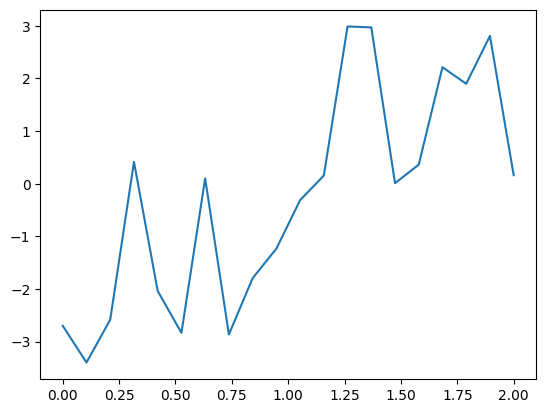

In [110]:

plt.plot(np.linspace(0, 2, 20), best_u)
print(state_equations(best_u, x0, 2.0/20))
print(best)

In [ ]:
u = np.arange(0, 1)